In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [43]:
df=pd.read_csv('/content/Admission_Predict (1).csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [44]:
df.shape

(400, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [46]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [47]:
df.drop(columns=['Serial No.'],inplace=True)

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt

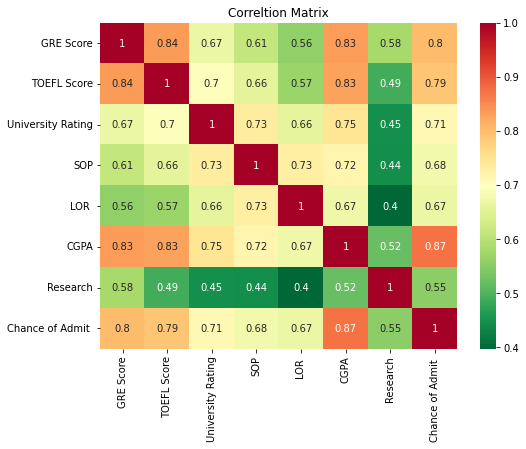

In [49]:
matrix = df.corr()
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(matrix,annot=True,cmap="RdYlGn_r")
plt.title("Correltion Matrix");

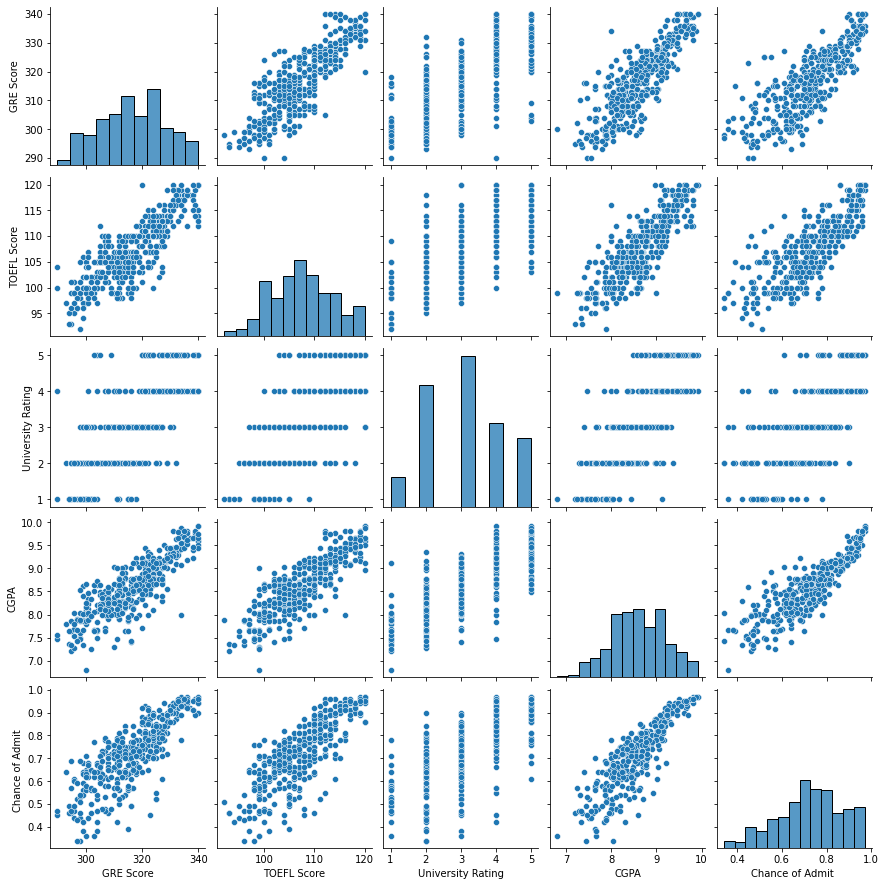

In [50]:
sns.pairplot(df.drop(columns=["LOR ","SOP","Research"]));

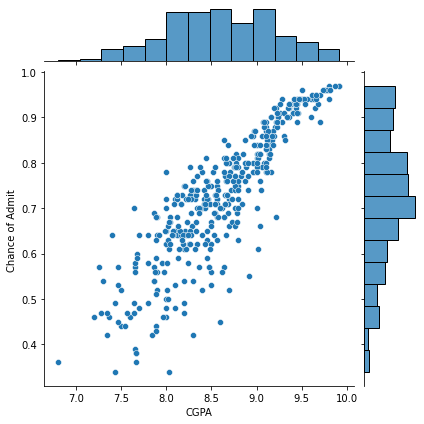

In [51]:
sns.jointplot(x="CGPA",y="Chance of Admit ",data=df);

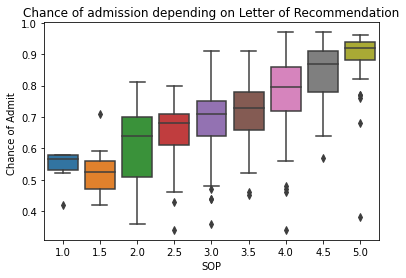

In [52]:
sns.boxplot(x="SOP",y="Chance of Admit ",data=df)
plt.title("Chance of admission depending on Letter of Recommendation");

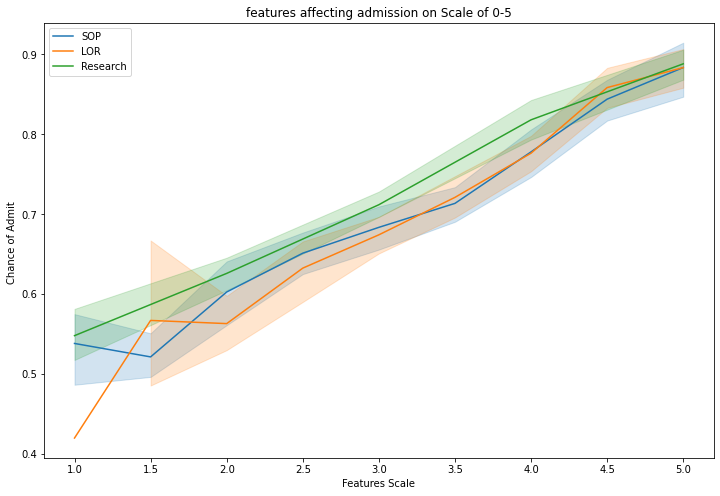

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(x="SOP",y="Chance of Admit ",data=df, label="SOP")
sns.lineplot(x="LOR ",y="Chance of Admit ",data=df, label="LOR")
sns.lineplot(x="University Rating",y="Chance of Admit ",data=df, label="Research")
plt.legend()
plt.title("features affecting admission on Scale of 0-5")
plt.xlabel("Features Scale")
plt.show()

In [54]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]


In [55]:
X.head

<bound method NDFrame.head of      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]>

In [56]:
y.head

<bound method NDFrame.head of 0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64>

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [58]:
from sklearn.preprocessing  import  MinMaxScaler
scaler=MinMaxScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)


In [59]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [60]:
from tensorflow import keras 
import tensorflow as tf  
from tensorflow.keras.layers import Dense
from keras import Sequential

In [61]:
model=Sequential()
model.add(Dense(7,activation ='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss='mean_squared_error',optimizer='Adam',)

In [63]:
history= model.fit(X_train_scale,y_train,validation_split=0.2,epochs=25)

Epoch 1/25
8/8 [==============================] - 1s 22ms/step - loss: 0.5293 - val_loss: 0.5272
Epoch 2/25
8/8 [==============================] - 0s 5ms/step - loss: 0.4489 - val_loss: 0.4447
Epoch 3/25
8/8 [==============================] - 0s 6ms/step - loss: 0.3771 - val_loss: 0.3687
Epoch 4/25
8/8 [==============================] - 0s 8ms/step - loss: 0.3106 - val_loss: 0.2996
Epoch 5/25
8/8 [==============================] - 0s 5ms/step - loss: 0.2482 - val_loss: 0.2357
Epoch 6/25
8/8 [==============================] - 0s 5ms/step - loss: 0.1887 - val_loss: 0.1772
Epoch 7/25
8/8 [==============================] - 0s 5ms/step - loss: 0.1386 - val_loss: 0.1247
Epoch 8/25
8/8 [==============================] - 0s 5ms/step - loss: 0.0949 - val_loss: 0.0822
Epoch 9/25
8/8 [==============================] - 0s 5ms/step - loss: 0.0603 - val_loss: 0.0512
Epoch 10/25
8/8 [==============================] - 0s 5ms/step - loss: 0.0362 - val_loss: 0.0320
Epoch 11/25
8/8 [=====================

In [64]:
y_pred=model.predict(X_test_scale)


3/3 [==============================] - 0s 7ms/step


In [65]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.615050646052244

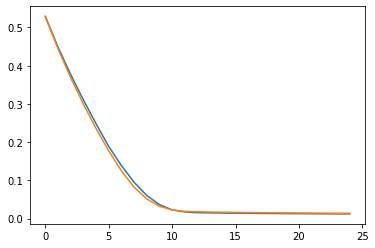

In [66]:
import matplotlib.pyplot as plt  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [67]:
import pickle

In [68]:
filename = 'Admission.Predictor_model.pkl'
pickle.dump(history, open(filename, 'wb'))

In [69]:
loaded_model = pickle.load(open(filename, 'rb'))